In [1]:
#Collecting the data
#processing the data(Resizing all the imags to a common size)
#Converting the rgb images to grayscale images
#Spliting the data into training and testing data
#Feeding the train data to the neural Network
#Feeding an handwritten digit to the neural network for prediction


In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
tf.random.set_seed(3)

In [12]:
#Loading the dataset
(X_train,Y_train),(X_test, Y_test)=mnist.load_data()

In [13]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [14]:
#Converting the numpy array to images
#Theyare alreday proccesed and converted to numpy array

3


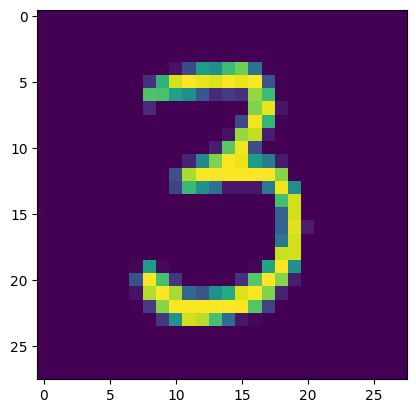

In [19]:
#Checking the dataset
plt.imshow(X_train[50])
print(Y_train[50])

In [22]:
#What are the unique values in y_train and y_test

print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [28]:
print(X_train[10])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
#Since the data is already proccesed we do not need to resize the images
#Scalling the images(It will be easy for the neural network to work on the scalled data)

#X_train=X_train/255
#X_test=X_test/255

In [31]:
#Building the neural Network(Not CNN)

#Setting up the layers of the neural Network
model=keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(50,activation='relu'),
                         keras.layers.Dense(50,activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid'),
])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
#Compiling the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [35]:
#Training the model
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9536 - loss: 0.1532
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9665 - loss: 0.1087
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9744 - loss: 0.0846
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9791 - loss: 0.0685
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9823 - loss: 0.0575
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9854 - loss: 0.0488
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9860 - loss: 0.0428
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9884 - loss: 0.0358
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9890 - loss: 0.0335
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: 0.0281


In [36]:
#Accuracy on test_data
loss,accuracy=model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9650 - loss: 0.1329


In [38]:
#Printing the shape of test data
X_test.shape

(10000, 28, 28)

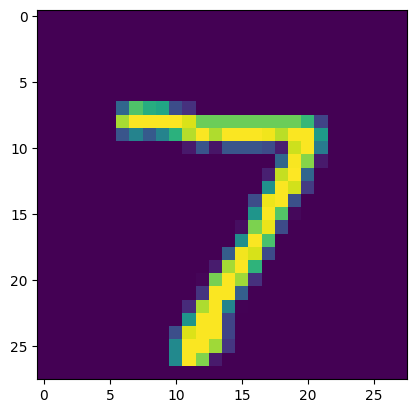

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [61]:
#First data point in the train dataset
plt.imshow(X_test[0])
plt.show()

In [40]:
print(Y_test[0])

7


In [41]:
#Model.predict() gives the prediction probability of each class for that data point
Y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [42]:
Y_pred.shape

(10000, 10)

In [43]:
print(Y_pred[0])

[1.1616233e-03 4.4567168e-02 6.5154204e-04 9.9746192e-01 4.7165184e-12
 3.4837425e-02 8.9555735e-15 1.0000000e+00 5.4224901e-04 9.8735136e-01]


In [44]:
#This gives the probbaility of all the labels

In [46]:
label_for_first_img=np.argmax(Y_pred[0])
print(label_for_first_img)

7


In [49]:
#Converting the prediction prob to class labels for all test data points

Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 0, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [53]:
#Building the confusion Matrix
conf_mat=confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 954    0    2    2    2    1    2    3    3   11]
 [   1 1116    3    3    0    2    3    1    5    1]
 [   4    1  998    9    2    0    4    6    8    0]
 [   0    0    1  987    0    6    0    4    5    7]
 [   0    0    3    0  946    0    2    3    3   25]
 [   3    0    0   19    0  854    2    2    6    6]
 [   6    2    0    0    7    6  935    0    2    0]
 [   0    2    9    7    1    0    0  996    2   11]
 [   6    0    3    9    2    5    0    3  939    7]
 [   1    2    0    3    6    4    0    4    5  984]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

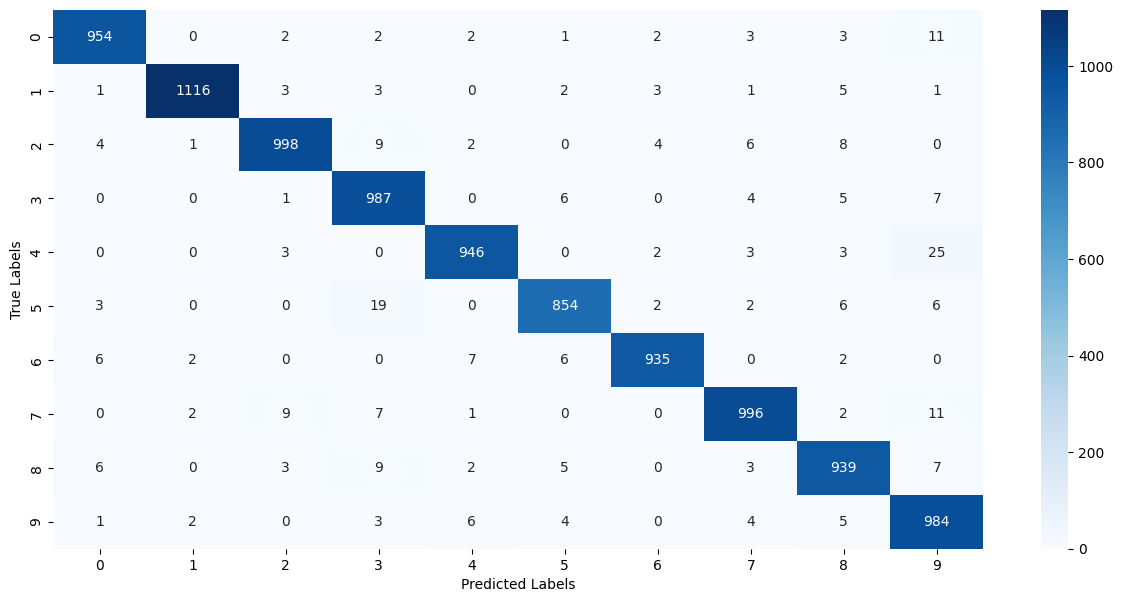

In [55]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
The digit is  4


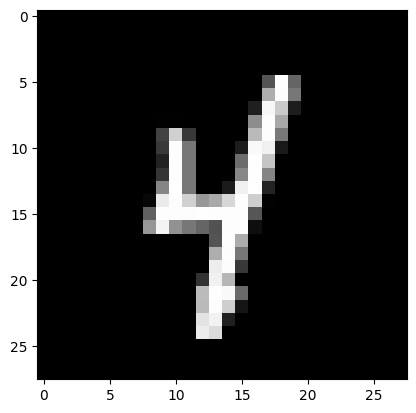

In [91]:
#Building the predictive system for the model
#from cv2 import cv2_imshow
input_image_path="C:/Users/user/OneDrive/Desktop/Mnist.png"
input_image=cv2.imread(input_image_path)
plt.imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
input_prediction_label=np.argmax(input_prediction)
print('The digit is ',input_prediction_label)